# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import date class from datetime module
from datetime import date
# Returns the current local date
today = date.today()

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url= f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

response = requests.get(query_url + city).json()
response
# data = response.json()
# data
#print(json.dumps(data, indent=4))
    

{'coord': {'lon': 25.5701, 'lat': -33.918},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 50.29,
  'feels_like': 49.39,
  'temp_min': 50.29,
  'temp_max': 52.11,
  'pressure': 1031,
  'humidity': 93},
 'visibility': 2900,
 'wind': {'speed': 4.61, 'deg': 280},
 'clouds': {'all': 40},
 'dt': 1627672402,
 'sys': {'type': 1,
  'id': 1973,
  'country': 'ZA',
  'sunrise': 1627621901,
  'sunset': 1627659386},
 'timezone': 7200,
 'id': 964420,
 'name': 'Port Elizabeth',
 'cod': 200}

In [8]:
#Empty lists to append to 
city_name=[]
cloudiness_list=[]
country_list=[]
date_list=[]
humidity_list=[]
lat_list=[]
lng_list=[]
max_temp_list=[]
wind_speed_list=[]

city_num = 0
print("Beginning Data Retrieval")
print("-------------------------------")

for city in cities:
    try:
        response= requests.get(query_url + city).json()
        city_name.append(response['name'])
        cloudiness_list.append(response['clouds']["all"])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response["main"]['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response["main"]['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        
        city_found = response["name"]
        print(f"Processing Record {city_num} of Set 1 | {city_found}")
        city_num = city_num + 1
        
    except:
        print("City not found. Skipping... ")
        
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Wenling
Processing Record 2 of Set 1 | Shingū
Processing Record 3 of Set 1 | Adrar
Processing Record 4 of Set 1 | East London
Processing Record 5 of Set 1 | Kruisfontein
Processing Record 6 of Set 1 | Bredasdorp
City not found. Skipping... 
Processing Record 7 of Set 1 | Punta Arenas
Processing Record 8 of Set 1 | Faanui
Processing Record 9 of Set 1 | Saint-Philippe
Processing Record 10 of Set 1 | Tondi
Processing Record 11 of Set 1 | Ushuaia
Processing Record 12 of Set 1 | Gaza
Processing Record 13 of Set 1 | Neryungri
Processing Record 14 of Set 1 | Mount Gambier
Processing Record 15 of Set 1 | Lárdos
Processing Record 16 of Set 1 | Ozernovskiy
Processing Record 17 of Set 1 | Hermanus
Processing Record 18 of Set 1 | Kapaa
Processing Record 19 of Set 1 | Cherskiy
Processing Record 20 of Set 1 | Bluff
City not found. Skipping... 
Processing Record 21 of Set 1 | Bethel
City not found. Skipping... 
Pr

Processing Record 180 of Set 1 | Aden
Processing Record 181 of Set 1 | Mazagão
Processing Record 182 of Set 1 | Fastiv
Processing Record 183 of Set 1 | Troitsko-Pechorsk
Processing Record 184 of Set 1 | Klaksvík
City not found. Skipping... 
Processing Record 185 of Set 1 | Namatanai
Processing Record 186 of Set 1 | Nanortalik
Processing Record 187 of Set 1 | Arraial do Cabo
Processing Record 188 of Set 1 | Cidreira
Processing Record 189 of Set 1 | Marystown
Processing Record 190 of Set 1 | Sitka
City not found. Skipping... 
City not found. Skipping... 
Processing Record 191 of Set 1 | Ciudad Bolivar
Processing Record 192 of Set 1 | Mapastepec
Processing Record 193 of Set 1 | Frolishchi
Processing Record 194 of Set 1 | Kericho
Processing Record 195 of Set 1 | Igrim
Processing Record 196 of Set 1 | Bathsheba
Processing Record 197 of Set 1 | Iqaluit
Processing Record 198 of Set 1 | Rønne
City not found. Skipping... 
Processing Record 199 of Set 1 | Zavodoukovsk
Processing Record 200 of Se

Processing Record 359 of Set 1 | Guiratinga
Processing Record 360 of Set 1 | Aklavik
City not found. Skipping... 
Processing Record 361 of Set 1 | Illapel
Processing Record 362 of Set 1 | Sittwe
City not found. Skipping... 
Processing Record 363 of Set 1 | Bilma
Processing Record 364 of Set 1 | Camaná
Processing Record 365 of Set 1 | Tura
Processing Record 366 of Set 1 | Antalaha
Processing Record 367 of Set 1 | Igarka
Processing Record 368 of Set 1 | Sakakah
Processing Record 369 of Set 1 | Puerto Carreño
Processing Record 370 of Set 1 | Santa Isabel Rio Negro
Processing Record 371 of Set 1 | Xiongyue
Processing Record 372 of Set 1 | Alice Springs
Processing Record 373 of Set 1 | Maceió
Processing Record 374 of Set 1 | Gberia Fotombu
Processing Record 375 of Set 1 | Almaznyy
Processing Record 376 of Set 1 | Mandiana
Processing Record 377 of Set 1 | Porto-Novo
Processing Record 378 of Set 1 | Dali
Processing Record 379 of Set 1 | Chapayevka
Processing Record 380 of Set 1 | Hasaki
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df=pd.DataFrame({
    "City":city_name,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list,
})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wenling,28.3669,121.3600,78.91,94,100,8.68,CN,1627672404
1,Shingū,33.7333,135.9833,77.92,86,16,4.07,JP,1627672404
2,Adrar,20.5022,-10.0711,101.84,16,36,5.32,MR,1627672405
3,East London,-33.0153,27.9116,60.24,72,12,6.42,ZA,1627672405
4,Kruisfontein,-34.0033,24.7314,49.89,79,26,1.97,ZA,1627672405
...,...,...,...,...,...,...,...,...,...
537,Santa Maria,-29.6842,-53.8069,56.23,51,0,5.37,BR,1627672575
538,Acajutla,13.5928,-89.8275,95.34,66,42,7.11,SV,1627672576
539,Alghero,40.5589,8.3181,82.99,89,0,9.22,IT,1627672576
540,Haines Junction,60.7522,-137.5108,66.15,45,0,2.30,CA,1627672576


In [10]:
weather_df.to_csv("../output_data/weather_df.csv", index=False, header=True)

In [11]:
#Looking at DataFrame to see if have 100% humidity
weather_stats_df=pd.DataFrame({
    "City":city_name,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list,
})

weather_stats_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,22.422254,16.651573,70.463653,67.896679,53.297048,8.075314,1.627672e+09
std,33.354330,92.553315,14.525984,22.061677,41.165981,5.663715,8.153991e+01
min,-54.800000,-179.166700,32.860000,11.000000,0.000000,0.000000,1.627672e+09
25%,-3.688225,-63.422475,58.787500,55.000000,7.000000,3.745000,1.627672e+09
50%,28.416800,22.872750,72.780000,72.000000,57.000000,6.530000,1.627672e+09
75%,50.346375,99.083100,81.095000,86.000000,99.000000,11.002500,1.627673e+09
max,78.218600,179.316700,105.440000,100.000000,100.000000,34.520000,1.627673e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [35]:
date= today.strftime("%m/%d/%Y")
date

'07/30/2021'

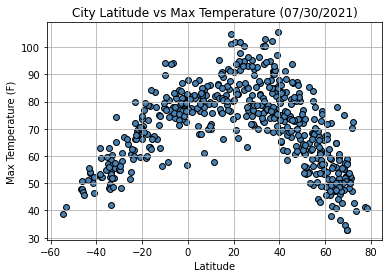

In [36]:
#weather_df.plot(kind="scatter", x= "Lat", y="Max Temp", marker="o", edgecolors="black", size="200")
plt.scatter(lat_list, max_temp_list, c ="steelblue",
            linewidths = 1,
            marker ="o", 
            edgecolor ="black", 
            s = 35)
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

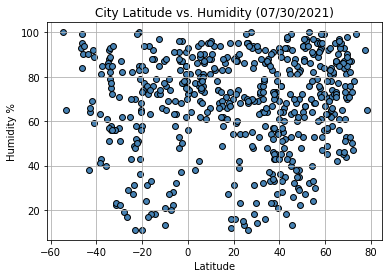

In [38]:
plt.scatter(lat_list, humidity_list, c="steelblue",
           linewidth = 1,
           marker = "o",
           edgecolor = "black",
           s = 35)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.show()

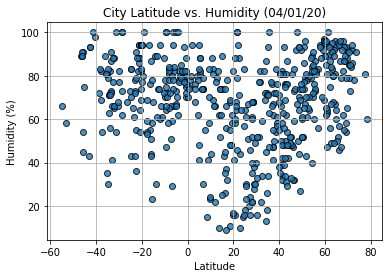

## Latitude vs. Cloudiness Plot

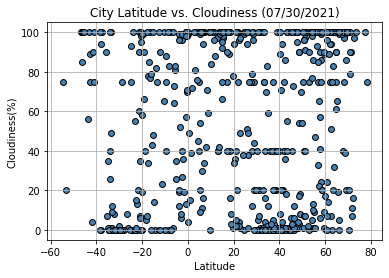

In [39]:
plt.scatter(lat_list, cloudiness_list, c="steelblue",
           linewidth= 1,
           marker = "o",
           edgecolor = "black",
           s = 35)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.show()

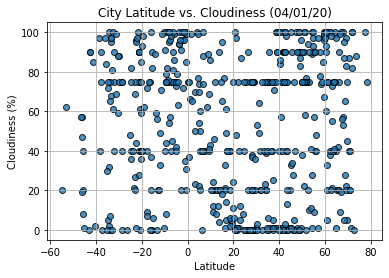

## Latitude vs. Wind Speed Plot

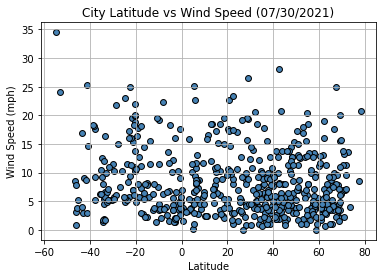

In [40]:
plt.scatter(lat_list, wind_speed_list, c="steelblue",
           linewidth= 1,
           marker = "o",
           edgecolor = "black",
           s =35)
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

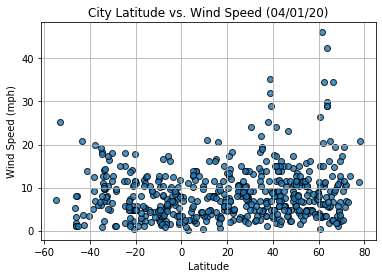

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
north= weather_df.loc[weather_df['Lat'] >=0]
south= weather_df.loc[weather_df['Lat'] <=0]

In [19]:
def regressline(x_values, y_values, ylabel, text_cord):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    #plot scatter plot
    plt.scatter(x_values, y_values)
    #plot regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_cord , fontsize =15, color="red")
    #label plot
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    #print r square value
    print(f"The r-value is: {rvalue**2}")

    #show plot
    plt.show()

The r-value is: 0.46538277930743793


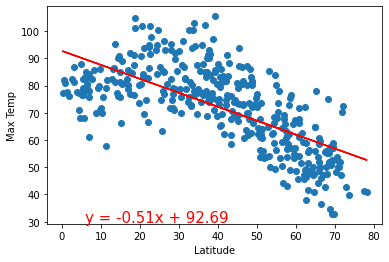

In [22]:
x_values= north["Lat"].astype('float')
y_values= north["Max Temp"].astype('float')
regressline(x_values, y_values, "Max Temp", (6,30))

The r-value is: 0.46937863826630627


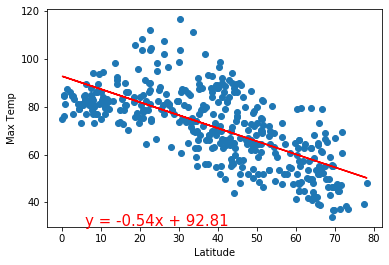

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7048377825850892


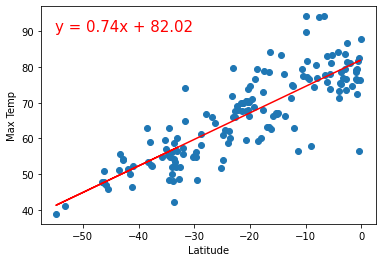

In [24]:
x_values= south["Lat"].astype('float')
y_values= south["Max Temp"].astype('float')
regressline(x_values, y_values, "Max Temp", (-55,90))

The r-value is: 0.6082708688906918


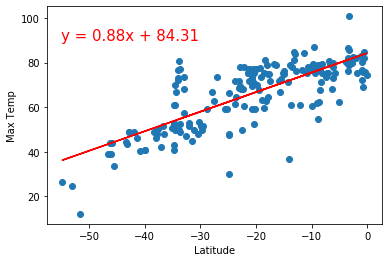

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00046399349125681474


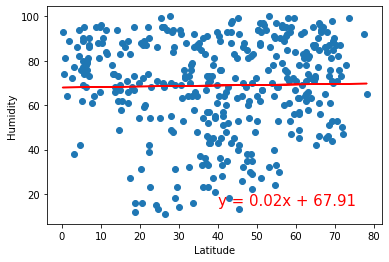

In [25]:
x_values= north["Lat"].astype('float')
y_values= north["Humidity"].astype('float')
regressline(x_values, y_values, "Humidity", (40,15))

The r-value is: 0.000543987878808455


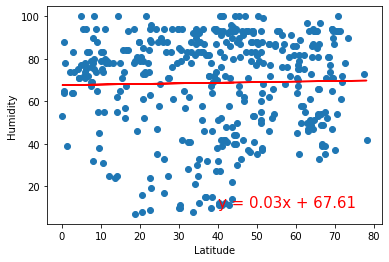

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0031935388190980642


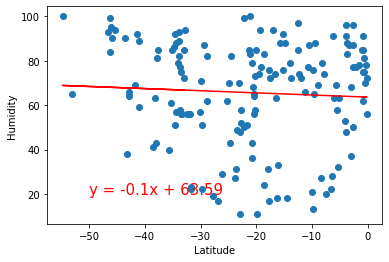

In [26]:
x_values= south["Lat"].astype('float')
y_values= south["Humidity"].astype('float')
regressline(x_values, y_values, "Humidity", (-50,20))

The r-value is: 0.014985174297345524


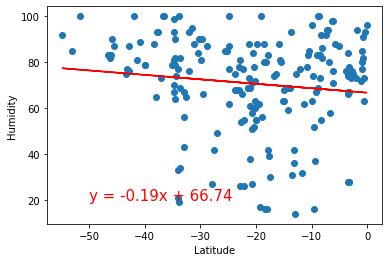

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 5.407398975570641e-05


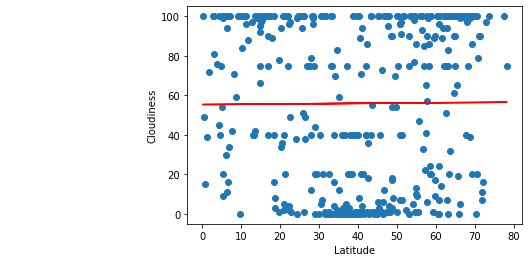

In [27]:
x_values= north["Lat"].astype('float')
y_values= north["Cloudiness"].astype('float')
regressline(x_values, y_values, "Cloudiness", (-50,20))

The r-value is: 0.0020898727664228514


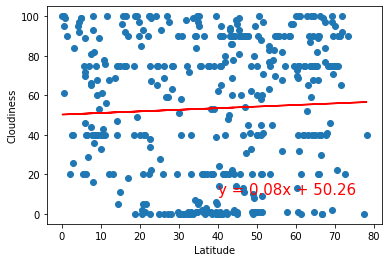

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.008397825922247392


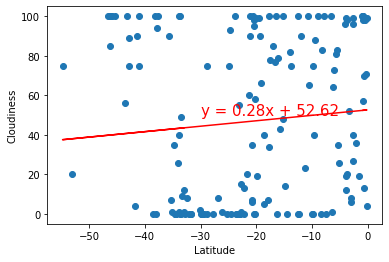

In [28]:
x_values= south["Lat"].astype('float')
y_values= south["Cloudiness"].astype('float')
regressline(x_values, y_values, "Cloudiness", (-30,50))

The r-value is: 0.0035263772085582894


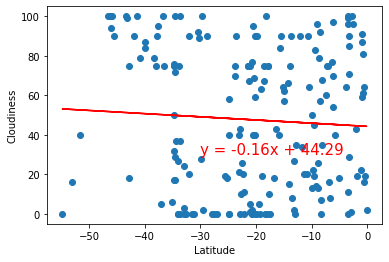

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.002976746778200833


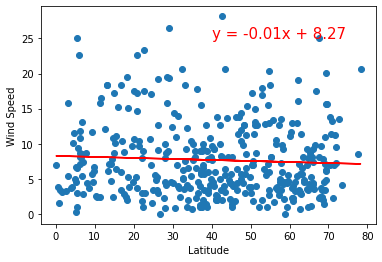

In [29]:
x_values= north["Lat"].astype('float')
y_values= north["Wind Speed"].astype('float')
regressline(x_values, y_values, "Wind Speed", (40,25))

The r-value is: 0.04019723576144484


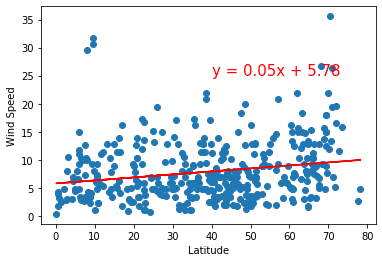

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04269228068577986


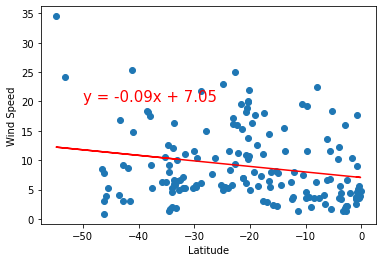

In [30]:
x_values= south["Lat"].astype('float')
y_values= south["Wind Speed"].astype('float')
regressline(x_values, y_values, "Wind Speed", (-50,20))

The r-value is: 0.017128274759839232


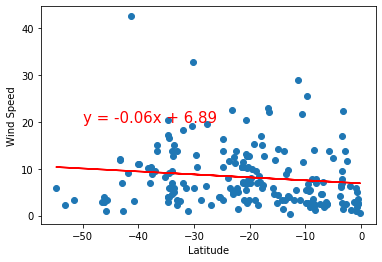